<a href="https://colab.research.google.com/github/MeenaBugatha/MEDICAL-DIAGNOSIS-OF-HUMAN-CARDIAC-ARREST-using-ML-models/blob/main/Heart_Diseases_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'drive', 'sample_data']


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Data science Lab/heart.csv")

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.shape

(1025, 14)

In [ ]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
799,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1
202,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
172,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
58,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
278,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [ ]:
dataset["target"].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [ ]:
dataset["target"].unique()

array([0, 1])

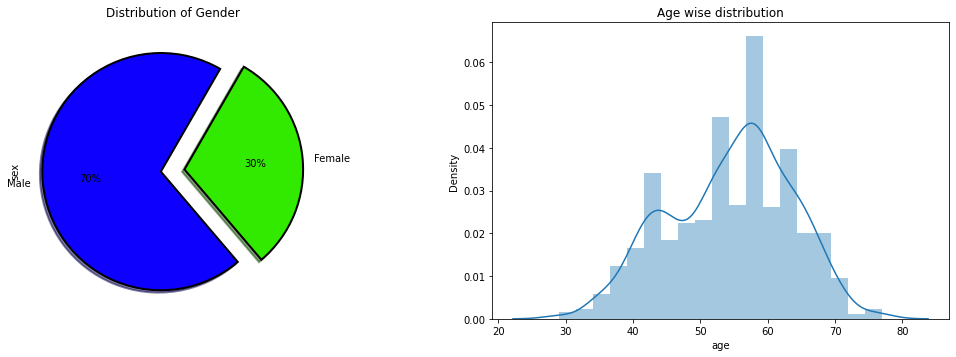

In [ ]:
plt.figure(figsize=(18,12))
plt.subplot(221)
dataset["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(dataset['age'], hist=True)
plt.title("Age wise distribution")
plt.show()

**PIE** **PLOT**

0 - Female => 312

Avearge : 30.4  ==>30%

1 - Male => 713

Average : 69.5 ==> 70%

Total - **1025**

**DIST** **PLOT** **WITH** **HISTOGRAM** & **KDE**

X-axis Age and Y -axis density

### **BOX** **PLOT**

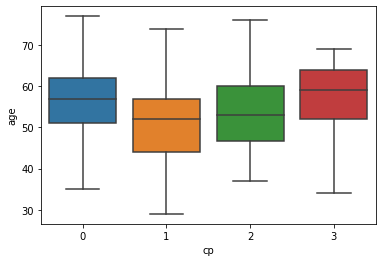

In [ ]:

sns.boxplot( x="cp", y='age', data=dataset, )
plt.show()

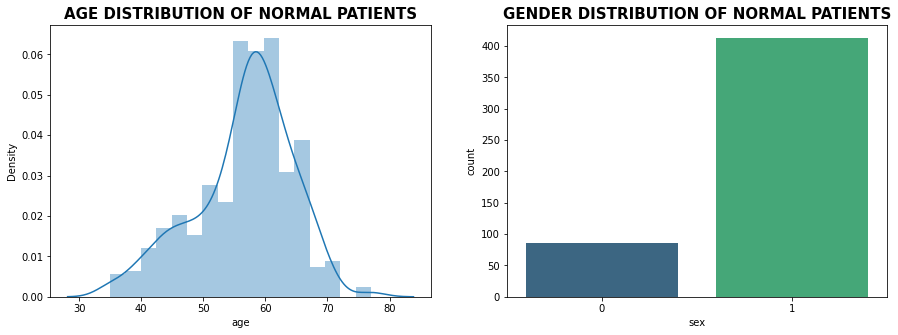

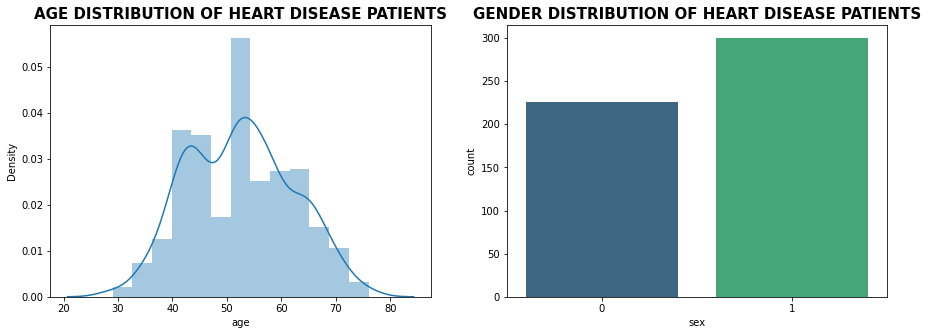

In [ ]:
# creating separate dataset for normal and heart patients

attr_1=dataset[dataset['target']==1]

attr_0=dataset[dataset['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

**COUNT** **PLOT**

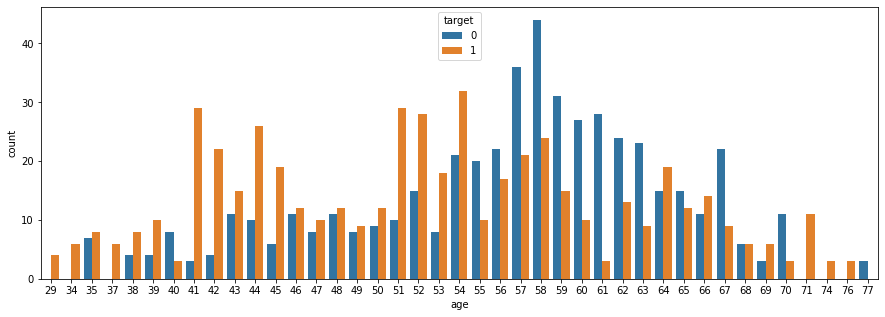

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='age',hue='target',data=dataset)
plt.show()

In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


1    526
0    499
Name: target, dtype: int64


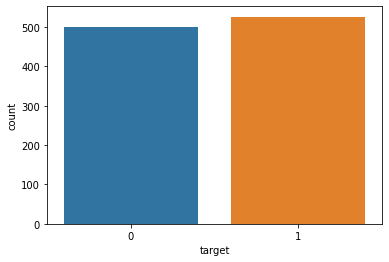

In [ ]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

**PAIR** **PLOT**

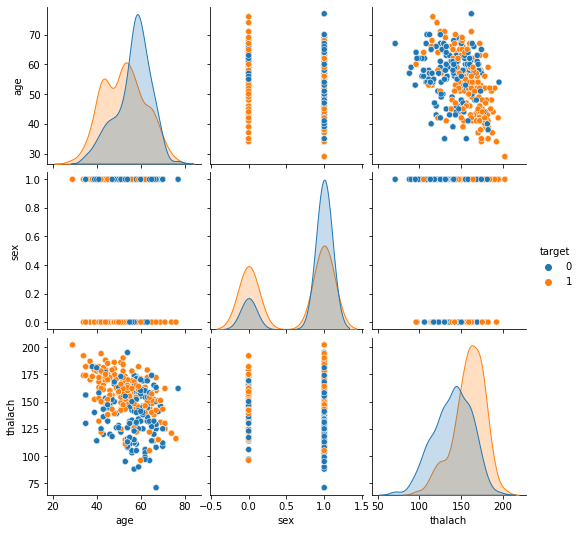

In [ ]:
sns.pairplot(dataset, hue = 'target', vars = ['age', 'sex','thalach'] )

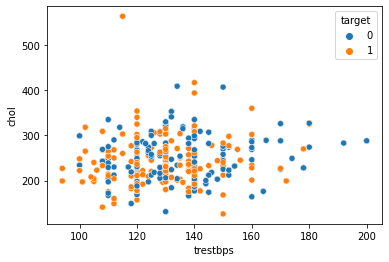

In [ ]:
sns.scatterplot(x = 'trestbps', y = 'chol', hue = 'target', data = dataset)

In [ ]:
print("Percentage of patience without cardiac arrest: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with cardiac arrest: "+str(round(target_temp[1]*100/303,2)))


Percentage of patience without cardiac arrest: 164.69
Percentage of patience with cardiac arrest: 173.6


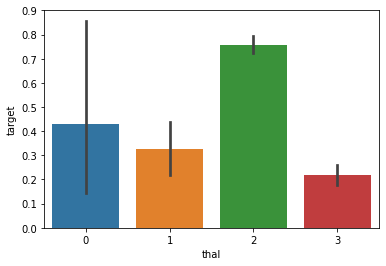

In [ ]:
sns.barplot(dataset["thal"],y)


In [ ]:
dataset["cp"].unique()

array([0, 1, 2, 3])

In [ ]:
dataset["fbs"].describe()

count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

In [ ]:
dataset["fbs"].unique()

array([0, 1])

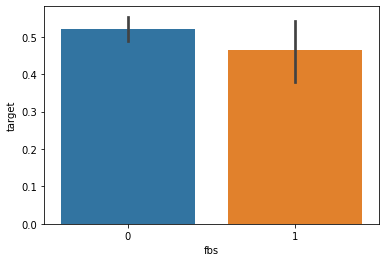

In [ ]:
sns.barplot(dataset["fbs"],y)

In [ ]:
dataset["restecg"].unique()

array([1, 0, 2])

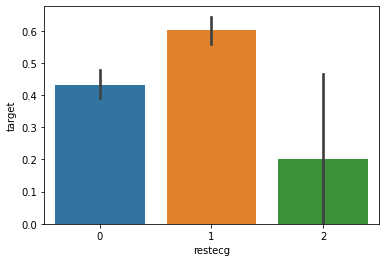

In [ ]:
sns.barplot(dataset["restecg"],y)

In [ ]:
dataset["exang"].unique()


array([0, 1])

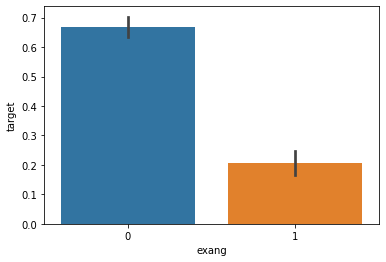

In [ ]:
sns.barplot(dataset["exang"],y)

In [ ]:
dataset["slope"].unique()


array([2, 0, 1])

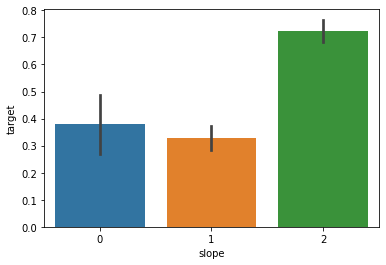

In [ ]:
sns.barplot(dataset["slope"],y)


In [ ]:
dataset["ca"].unique()

array([2, 0, 1, 3, 4])

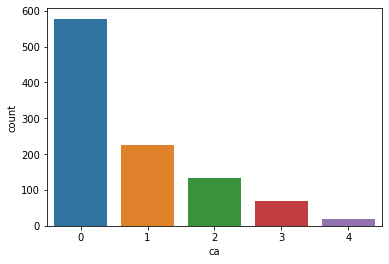

In [ ]:
sns.countplot(dataset["ca"])

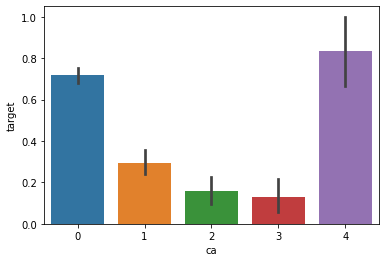

In [ ]:
sns.barplot(dataset["ca"],y)

In [ ]:
dataset["thal"].unique()

array([3, 2, 1, 0])

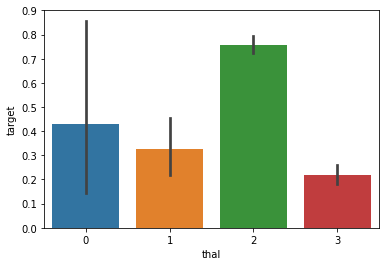

In [ ]:
sns.barplot(dataset["thal"],y)

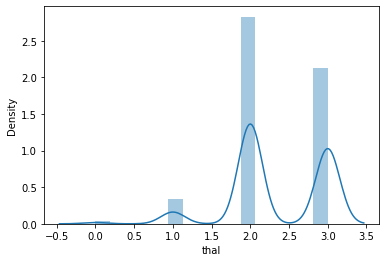

In [ ]:
sns.distplot(dataset["thal"])

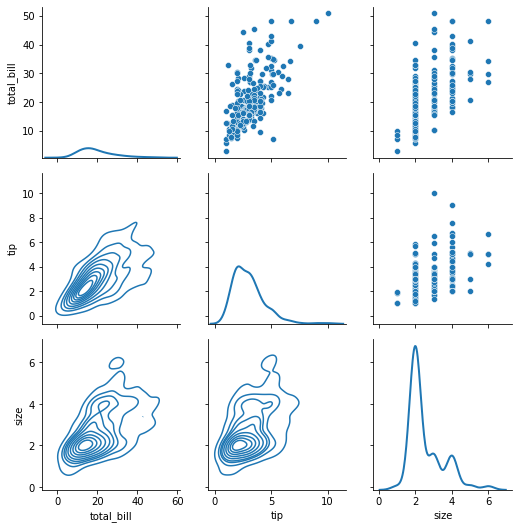

In [ ]:
dataset = seaborn.load_dataset('tips')

graph = seaborn.PairGrid(dataset)
# type of graph for non-diagonal(upper part)
graph = graph.map_upper(sns.scatterplot)
# type of graph for non-diagonal(lower part)
graph = graph.map_lower(sns.kdeplot)
# type of graph for diagonal
graph = graph.map_diag(sns.kdeplot, lw = 2)
# to show
plt.show()
# This code is contributed by Deepanshu Rusatgi.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

NameError: ignored

In [ ]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

In [ ]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

2nd way of spliting train-dataset

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
Y_train.shape

In [ ]:
Y_test.shape

In [ ]:
from sklearn.metrics import accuracy_score

Logistic Regression Algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

print(X_test)

In [ ]:
Y_pred_lr.shape

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")


KNeighbors ALgorithms

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
print(X_train)
print(Y_train)


In [ ]:
Y_pred_knn.shape

In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

Gradient Boosting Algorithm


In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)
print(X_test)

In [ ]:
Y_pred_xgb.shape

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")


In [ ]:
dataset_top8 = dataset.loc[:,['cp','oldpeak','thal','ca','thalach','age','chol','trestbps','exang']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

In [ ]:
# Import ML Libraries
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

classifiers = [[XGBClassifier(),'XGB Classifier'], [RandomForestClassifier(),'Random Forest'],
    [KNeighborsClassifier(), 'K-Nearest Neighbours'],
              [GaussianNB(),'GaussianNB'],[DecisionTreeClassifier(),'Decision Tree Classifier'],[LogisticRegression(),'Logistic Regression']]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(dataset_top8,y,test_size=0.25,random_state=0)
clf = AdaBoostClassifier()
clf.fit(x_train,y_train)
prediction = clf.predict(x_test)
accuracy = accuracy_score(prediction,y_test)
cm = confusion_matrix(prediction,y_test)
prfs = precision_recall_fscore_support(prediction,y_test)
print('Accuracy:',accuracy)
print('\n')
print('Confusion Matrix: ',cm)
print('\n')
print('Precision: ', prfs[0])
print('Recall:    ', prfs[1])
print('Fscore:    ', prfs[2])
print('Support:   ', prfs[3])

The accuracy score achieved using Logistic Regression is: 86.34 %
The accuracy score achieved using KNN is: 72.2 %
The accuracy score achieved using XGBoost is: 97.56 %
The accuracy score nachieved using ADA Boost is : 91.43%
The accuracy score achieved using Random forest is: 70.26 %
The accuracy score achieved using K-Nearest Neighbours is : 83.98%
The accuracy score achieved using SVC is: 88.62 %
